### 위키백과 크롤링

In [7]:
import urllib.request
from bs4 import BeautifulSoup
import requests

pages = []

url = "https://en.wikipedia.org/wiki/Network_science"
req = urllib.request.Request(url)
sourcecode = urllib.request.urlopen(url).read()
soup = BeautifulSoup(sourcecode, "html.parser")

for href in soup.find("div", class_ ="div-col").find_all("li"):
    pages.append("https://en.wikipedia.org"+href.find("a")["href"])

print(pages)

['https://en.wikipedia.org/wiki/Cascading_failure', 'https://en.wikipedia.org/wiki/Climate_as_complex_networks', 'https://en.wikipedia.org/wiki/Collaborative_innovation_network', 'https://en.wikipedia.org/wiki/Communicative_ecology', 'https://en.wikipedia.org/wiki/Complex_network', 'https://en.wikipedia.org/wiki/Core-periphery_structure', 'https://en.wikipedia.org/wiki/Dual-phase_evolution', 'https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model', 'https://en.wikipedia.org/wiki/Glossary_of_graph_theory', 'https://en.wikipedia.org/wiki/Gradient_network', 'https://en.wikipedia.org/wiki/Higher_category_theory', 'https://en.wikipedia.org/wiki/Immune_network_theory', 'https://en.wikipedia.org/wiki/Irregular_warfare', 'https://en.wikipedia.org/wiki/Interdependent_networks', 'https://en.wikipedia.org/wiki/Network_management', 'https://en.wikipedia.org/wiki/Network_dynamics', 'https://en.wikipedia.org/wiki/Network_formation', 'https://en.wikipedia.org/wiki/Network_theory_in_risk_as

In [2]:
def get_html(url):
    html = ""
    resp = requests.get(url)
    
    if resp.status_code == 200:
        html = resp.text
    return html

In [3]:
import re

def crawl_div_col(html):
    
    soup = BeautifulSoup(html)
    
    li_list = soup.select("div.div-col > ul > li > a")
    text = re.sub('<.+?>', '', str(li_list), 0).strip()
    
    return text

In [4]:
def crawl_mw_parser_output(html):
    
    soup = BeautifulSoup(html)
    
    li_list = soup.select("div.mw-parser-output > ul > li > a")
    text = re.sub('<.+?>', '', str(li_list), 0).strip()
    
    return text

In [8]:
div_col = []

for i in range(0, len(pages)-1):
    html = get_html(pages[i])
    div_col.append(crawl_div_col(html))

In [9]:
print(div_col) # div.div-col에 해당되는 데이터만 가져와진다.

['[Blackouts, Brittle system, Butterfly effect, Byzantine failure, Cascading rollback, Chain reaction, Chaos theory, Cache stampede, Congestion collapse, Domino effect, For Want of a Nail (proverb), Network science, Network theory, Interdependent networks, Kessler Syndrome, Percolation theory, Progressive collapse, Virtuous circle and vicious circle, Wicked problem]', '[]', '[]', '[]', '[Community structure, Complex adaptive system, Complex systems, Dual-phase evolution, Dynamic network analysis, Interdependent networks, Network theory, Network science, Percolation theory, Random graph, Random graph theory of gelation, Scale-free networks, Small world networks, Spatial network, Trophic coherence]', '[]', '[]', '[]', '[]', '[]', '[]', '[]', '[Civilian casualty ratio, Endemic warfare, Fourth-generation warfare, Hague Conventions (1899 and 1907), Information warfare, Irregular military, Low-intensity conflict, Political warfare, Psychological operations, The Troubles, War on Terror, War o

In [10]:
mw_parser_output = []

for i in range(0, len(pages)-1):
    html = get_html(pages[i])
    mw_parser_output.append(crawl_mw_parser_output(html))

In [11]:
mw_parser_output

['[Blackout in Northeast America in 1965, Blackout in Southern Brazil in 1999, Blackout in Northeast America in 2003, Blackout in Italy in 2003, Blackout in London in 2003, European Blackout in 2006, Blackout in Northern India in 2012, Blackout in South Australia in 2016, Blackout in southeast South America in 2019, Space Weather: Blackout — Massive Power Grid Failure, Cascading failure demo applet, Cascade-based attacks on complex networks,, Model for cascading failures in complex networks,, Protection Strategies for Cascading Grid Failures — A Shortcut Approach, preprint, Nova: Crash of Flight 111, Swissair Flight 111, Accident grounds neutrino lab, The Structure and Dynamics of Large Scale Organizational Networks (Dan Braha, New England Complex Systems Institute), From Single Network to Network of Networks]',
 '[Community structure, Network theory, Network science, Teleconnection, Climatology]',
 '[Collective intelligence, Polytely, Swarm intelligence, Open politics, Symbolic intera

### 에고 노드의 이웃

In [12]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen("https://en.wikipedia.org/wiki/Network_science")
bsobject = BeautifulSoup(html, "html.parser") # html 정보 가져오기

In [13]:
li_code = bsobject.select('div.div-col>ul>li')

ulli_total = []

for c in range(0,len(li_code)-1):
    ulli_total.append(li_code[c].get_text())

print(ulli_total)

['Cascading failure', 'Climate as complex networks', 'Collaborative innovation network', 'Communicative ecology', 'Complex network', 'Core-periphery structures in networks', 'Dual-phase evolution', 'Erdős–Rényi model', 'Glossary of graph theory', 'Gradient network', 'Higher category theory', 'Immune network theory', 'Irregular warfare', 'Interdependent networks', 'Network analyzer', 'Network dynamics', 'Network formation', 'Network theory in risk assessment', 'Network topology', 'Networks in labor economics', 'Non-linear preferential attachment', 'Percolation', 'Percolation theory', 'Policy network analysis', 'Polytely', 'Quantum complex network', 'Random networks', 'Rumor spread in social network', 'Scale-free networks', 'Sequential dynamical system', 'Service network', 'Small-world networks', 'Structural cut-off']


### 결합

In [14]:
import pandas as pd
import numpy as np

In [15]:
df = pd.DataFrame(ulli_total, columns = ['neighbor'])
df.insert(0,'core',np.nan)
df = df.fillna('Network Science')
df

,core,neighbor
0,Network Science,Cascading failure
1,Network Science,Climate as complex networks
2,Network Science,Collaborative innovation network
3,Network Science,Communicative ecology
4,Network Science,Complex network
5,Network Science,Core-periphery structures in networks
6,Network Science,Dual-phase evolution
7,Network Science,Erdős–Rényi model
8,Network Science,Glossary of graph theory
9,Network Science,Gradient network


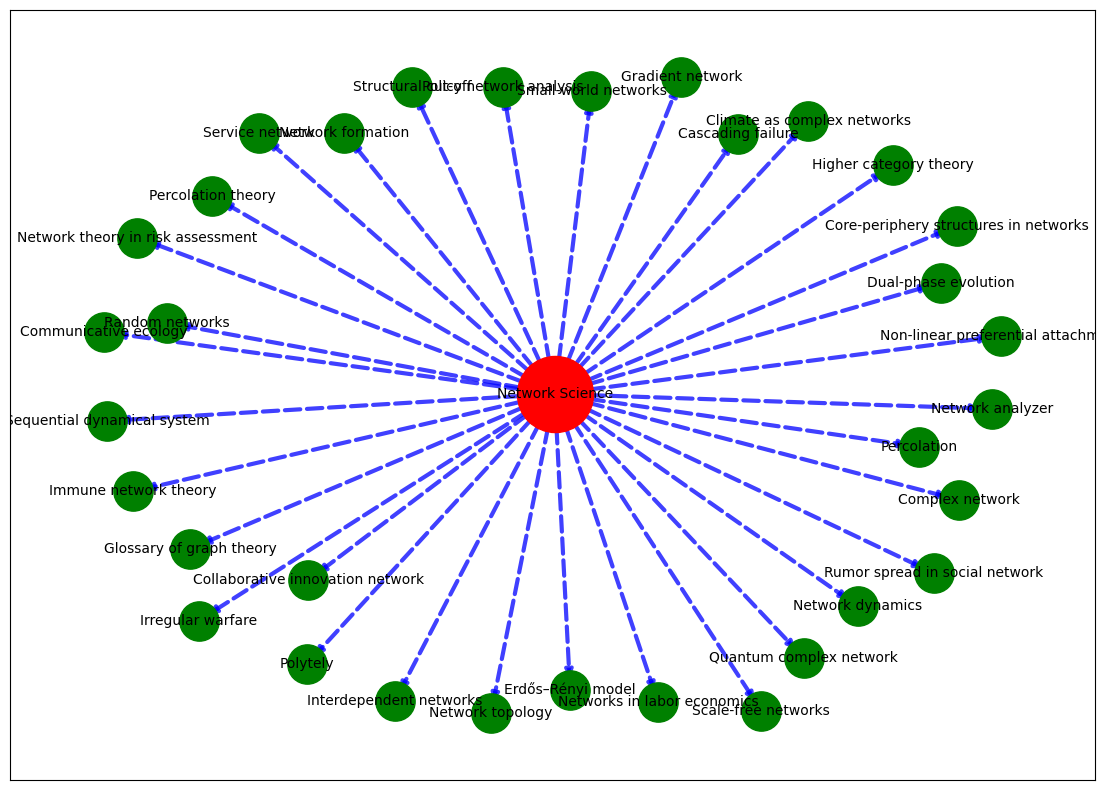

In [42]:
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize = (14,10))

# Network Science의 그래프
g = nx.from_pandas_edgelist(df,'core','neighbor', create_using=nx.DiGraph())

ego = 'Network Science'

pos = nx.spring_layout(g)

ego_options = {"node_size":3000, "node_color":"r"}
options = {"node_size" : 800, "node_color" : "g" }

nx.draw_networkx_nodes(g, pos, nodelist=[ego],**ego_options) # ego 노드 크기와 색상 별도 설정
nx.draw_networkx_nodes(g, pos, nodelist=list(g.nodes())[1:len(g.nodes())],**options) 

nx.draw_networkx_labels(g, pos, font_size = 10)

nx.draw_networkx_edges(g, pos,  width = 3,
                       style = "dashed", alpha = 0.75, edge_color="b")

self = list(nx.selfloop_edges(g))
g.remove_edges_from(self)

plt.show()

### 이웃의 이웃

In [16]:
neigh_df = ""

for i in range(0, len(ulli_total)-1):
    a = list(div_col[i].split(','))
    b = []
    for j in range(len(a)):
        b.append(ulli_total[i])
    b.extend(a)  
    neigh_df = pd.DataFrame([b[0:int(len(b)/2)],b[int(len(b)/2):]])
    neigh_df = neigh_df.transpose()
    display(neigh_df)

,0,1
0,Cascading failure,[Blackouts
1,Cascading failure,Brittle system
2,Cascading failure,Butterfly effect
3,Cascading failure,Byzantine failure
4,Cascading failure,Cascading rollback
5,Cascading failure,Chain reaction
6,Cascading failure,Chaos theory
7,Cascading failure,Cache stampede
8,Cascading failure,Congestion collapse
9,Cascading failure,Domino effect


,0,1
0,Climate as complex networks,[]


,0,1
0,Collaborative innovation network,[]


,0,1
0,Communicative ecology,[]


,0,1
0,Complex network,[Community structure
1,Complex network,Complex adaptive system
2,Complex network,Complex systems
3,Complex network,Dual-phase evolution
4,Complex network,Dynamic network analysis
5,Complex network,Interdependent networks
6,Complex network,Network theory
7,Complex network,Network science
8,Complex network,Percolation theory
9,Complex network,Random graph


,0,1
0,Core-periphery structures in networks,[]


,0,1
0,Dual-phase evolution,[]


,0,1
0,Erdős–Rényi model,[]


,0,1
0,Glossary of graph theory,[]


,0,1
0,Gradient network,[]


,0,1
0,Higher category theory,[]


,0,1
0,Immune network theory,[]


,0,1
0,Irregular warfare,[Civilian casualty ratio
1,Irregular warfare,Endemic warfare
2,Irregular warfare,Fourth-generation warfare
3,Irregular warfare,Hague Conventions (1899 and 1907)
4,Irregular warfare,Information warfare
5,Irregular warfare,Irregular military
6,Irregular warfare,Low-intensity conflict
7,Irregular warfare,Political warfare
8,Irregular warfare,Psychological operations
9,Irregular warfare,The Troubles


,0,1
0,Interdependent networks,[]


,0,1
0,Network analyzer,[Application service management
1,Network analyzer,Business service management
2,Network analyzer,Capacity management
3,Network analyzer,Comparison of network monitoring systems
4,Network analyzer,FCAPS
5,Network analyzer,In-network management
6,Network analyzer,ITIL
7,Network analyzer,Integrated business planning
8,Network analyzer,Network and service management taxonomy
9,Network analyzer,Network monitoring


,0,1
0,Network dynamics,[Biological network inference
1,Network dynamics,Cellular neural network
2,Network dynamics,Dual-phase evolution
3,Network dynamics,Dynamic Bayesian network
4,Network dynamics,Dynamic network analysis
5,Network dynamics,Dynamic single-frequency networks
6,Network dynamics,Gaussian network model
7,Network dynamics,Gene regulatory network
8,Network dynamics,Gradient network
9,Network dynamics,Network planning and design


,0,1
0,Network formation,[]


,0,1
0,Network theory in risk assessment,[]


,0,1
0,Network topology,[Broadcast communication network
1,Network topology,Butterfly network
2,Network topology,Computer network diagram
3,Network topology,Gradient network
4,Network topology,Internet topology
5,Network topology,Network simulation
6,Network topology,Relay network
7,Network topology,Rhizome (philosophy)
8,Network topology,Scale-free network
9,Network topology,Shared mesh


,0,1
0,Networks in labor economics,[]


,0,1
0,Non-linear preferential attachment,[]


,0,1
0,Percolation,[Branched polymer
1,Percolation,Conductance
2,Percolation,Critical exponents
3,Percolation,Fragmentation
4,Percolation,Gelation
5,Percolation,Giant component
6,Percolation,Groundwater recharge
7,Percolation,Immunization
8,Percolation,Network theory
9,Percolation,Percolation critical exponents


,0,1
0,Percolation theory,[Continuum percolation theory
1,Percolation theory,Critical exponent
2,Percolation theory,Directed percolation
3,Percolation theory,Erdős–Rényi model
4,Percolation theory,Fractal
5,Percolation theory,Giant component
6,Percolation theory,Graph theory
7,Percolation theory,Interdependent networks
8,Percolation theory,Invasion percolation
9,Percolation theory,Kahn–Kalai conjecture


,0,1
0,Policy network analysis,[]


,0,1
0,Polytely,[Cognitive science
1,Polytely,Concurrent computing
2,Polytely,Dietrich Dörner
3,Polytely,Game theory
4,Polytely,Goal-oriented
5,Polytely,Multi-agent system
6,Polytely,Multi-criteria decision analysis
7,Polytely,Multiobjective optimization
8,Polytely,Network science
9,Polytely,Organizational studies


,0,1
0,Quantum complex network,[]


,0,1
0,Random networks,[]


,0,1
0,Rumor spread in social network,[]


,0,1
0,Scale-free networks,[]


,0,1
0,Sequential dynamical system,[]


,0,1
0,Service network,[]


,0,1
0,Small-world networks,[]


In [87]:
a = list(div_col[0].split(','))
b = []
for i in range(len(a)):
    b.append(ulli_total[0])
b.extend(a)  
neigh_df = pd.DataFrame([b[0:int(len(b)/2)],b[int(len(b)/2):]])
neigh_df = neigh_df.transpose()
neigh_df

,0,1
0,Cascading failure,[Blackouts
1,Cascading failure,Brittle system
2,Cascading failure,Butterfly effect
3,Cascading failure,Byzantine failure
4,Cascading failure,Cascading rollback
5,Cascading failure,Chain reaction
6,Cascading failure,Chaos theory
7,Cascading failure,Cache stampede
8,Cascading failure,Congestion collapse
9,Cascading failure,Domino effect


In [84]:
pd.DataFrame([b[0:19],b[19:38]])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,Cascading failure,Cascading failure,Cascading failure,Cascading failure,Cascading failure,Cascading failure,Cascading failure,Cascading failure,Cascading failure,Cascading failure,Cascading failure,Cascading failure,Cascading failure,Cascading failure,Cascading failure,Cascading failure,Cascading failure,Cascading failure,Cascading failure
1,[Blackouts,Brittle system,Butterfly effect,Byzantine failure,Cascading rollback,Chain reaction,Chaos theory,Cache stampede,Congestion collapse,Domino effect,For Want of a Nail (proverb),Network science,Network theory,Interdependent networks,Kessler Syndrome,Percolation theory,Progressive collapse,Virtuous circle and vicious circle,Wicked problem]


In [ ]:
b[:int(len(b)/2-1)]

['Cascading failure',
 'Cascading failure',
 'Cascading failure',
 'Cascading failure',
 'Cascading failure',
 'Cascading failure',
 'Cascading failure',
 'Cascading failure',
 'Cascading failure',
 'Cascading failure',
 'Cascading failure',
 'Cascading failure',
 'Cascading failure',
 'Cascading failure',
 'Cascading failure',
 'Cascading failure',
 'Cascading failure',
 'Cascading failure']